<a href="https://colab.research.google.com/github/hayleypc/BPCA_HFF/blob/main/BPCA_analysis_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘Rcpp’




In [4]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=bf481dc2501a8c4e362c857eb8d19670&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbGlDeXl0UjVLQzhYMWY2Zl8xd1RMYkJ6d1Zoa1cyd1p4NGI3bDRaV0dBMDBhbHdheFpzSDNEay0yS21TaGs1QSIsInN0YXRlIjoiYmY0ODFkYzI1MDFhOGM0ZTM2MmM4NTdlYjhkMTk2NzAifQ==


In [7]:

# https://drive.google.com/file/d/1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv/view?usp=drive_link
drive_download(file = as_id('1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv'), path = '/content/firehistory_region_intersect.gpkg', overwrite = TRUE)

File downloaded:

• firehistory_region_intersect.gpkg <id: 1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv>

Saved locally as:

• /content/firehistory_region_intersect.gpkg



In [8]:
# Coarse Woody Debris
# https://drive.google.com/file/d/1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0/view?usp=drive_link
drive_download(file = as_id('1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0'), path = '/content/cwd_rate_table.csv', overwrite = TRUE)

File downloaded:

• cwd_rate_table.csv <id: 1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0>

Saved locally as:

• /content/cwd_rate_table.csv



In [23]:
# LF fractionation
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'full_bpca_exp_dt.csv']$id

drive_download(file = as_id(file_id), path = '/content/full_bpca_exp_dt.csv', overwrite = TRUE)

File downloaded:

• full_bpca_exp_dt.csv <id: 1664xblDUK5yG4zzhhXXomgwK-wR6p31b>

Saved locally as:

• /content/full_bpca_exp_dt.csv



In [10]:
# LF fractionation
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'standards.csv']$id

drive_download(file = as_id(file_id), path = '/content/standards.csv', overwrite = TRUE)

File downloaded:

• standards.csv <id: 1zNR-qpUKPnO6OpArQYuuweoMG505F7pw>

Saved locally as:

• /content/standards.csv



In [12]:
cwd_rate_table <- fread('/content/cwd_rate_table.csv')

In [24]:
full_bpca_exp_dt <- fread('/content/full_bpca_exp_dt.csv')

In [25]:
full_bpca_exp_dt$V1 <- NULL

In [41]:
full_bpca_exp_dt$FRACTION <- full_bpca_exp_dt$FRACTION  %>% factor(levels = c('LF','HF','BULK'))
full_bpca_exp_dt$DEPTH <- full_bpca_exp_dt$DEPTH  %>% factor(levels = c('0-5','5-10','10-20','20-30'))
full_bpca_exp_dt$BURN_SEVERITY <- full_bpca_exp_dt$BURN_SEVERITY  %>% factor(levels = c('control','low','moderate','high'))

In [73]:
full_bpca_exp_dt %>% names

[1] "SITE"                           "FRACTION"                      
 [3] "DEPTH"                          "BURN_SEVERITY"                 
 [5] "TREATMENT"                      "DEPTH_UPPER"                   
 [7] "DEPTH_LOWER"                    "CONC_240"                      
 [9] "CONC_216"                       "CONC_MEAN"                     
[11] "PEARSONS"                       "FRACTIONATION_MASS_RECOVERED_G"
[13] "STARTING_FRACT_MASS_SOIL_G"     "MASS_PROPORTION_RECOVERED"     
[15] "RECOVERY"                       "C_PERC"                        
[17] "N_PERC"                         "ACCEPT"                        
[19] "BPCA_STARTING_MASS_MG"          "mg_ml_bpca"                    
[21] "g_kg_bpca_lf"

In [81]:
full_bpca_exp_dt[,mg_ml_bpca := (CONC_MEAN/BPCA_STARTING_MASS_MG) ]
full_bpca_exp_dt[,g_kg_bpca_lf := MASS_PROPORTION_RECOVERED*mg_ml_bpca,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,per_bpca_carb_lf := mg_ml_bpca/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]

In [102]:
analysis_full_bpca_exp_dt <-
full_bpca_exp_dt[ACCEPT =='T' &!is.na(DEPTH),list(
  CONC_MEAN=mean(CONC_MEAN,na.rm=T),
  C_PERC=mean(C_PERC,na.rm=T),
  N_PERC=mean(N_PERC,na.rm=T),
  mg_ml_bpca=mean(mg_ml_bpca,na.rm=T),
  g_kg_bpca_lf=mean(g_kg_bpca_lf,na.rm=T),
  per_bpca_carb_lf = mean(per_bpca_carb_lf,na.rm=T),
  MASS_PROPORTION_RECOVERED=mean(MASS_PROPORTION_RECOVERED,na.rm=T)
  ),by=c('SITE','FRACTION','DEPTH','BURN_SEVERITY','TREATMENT','DEPTH_UPPER','DEPTH_LOWER')]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


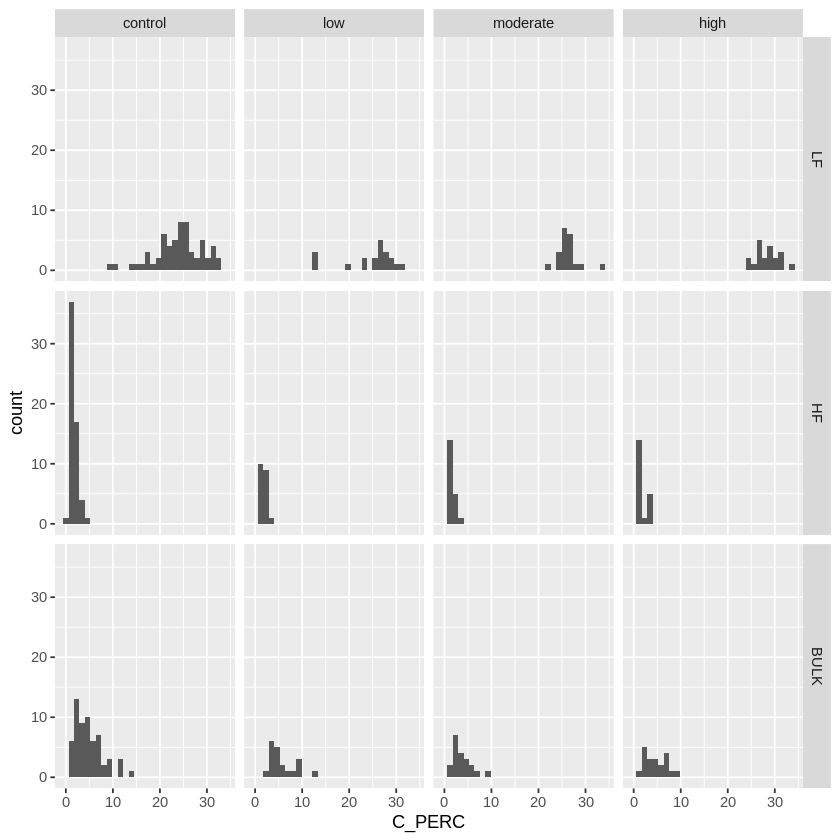

In [103]:
analysis_full_bpca_exp_dt%>%
  ggplot(aes(x=C_PERC))+
    geom_histogram()+
    facet_grid(FRACTION~BURN_SEVERITY)

Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”


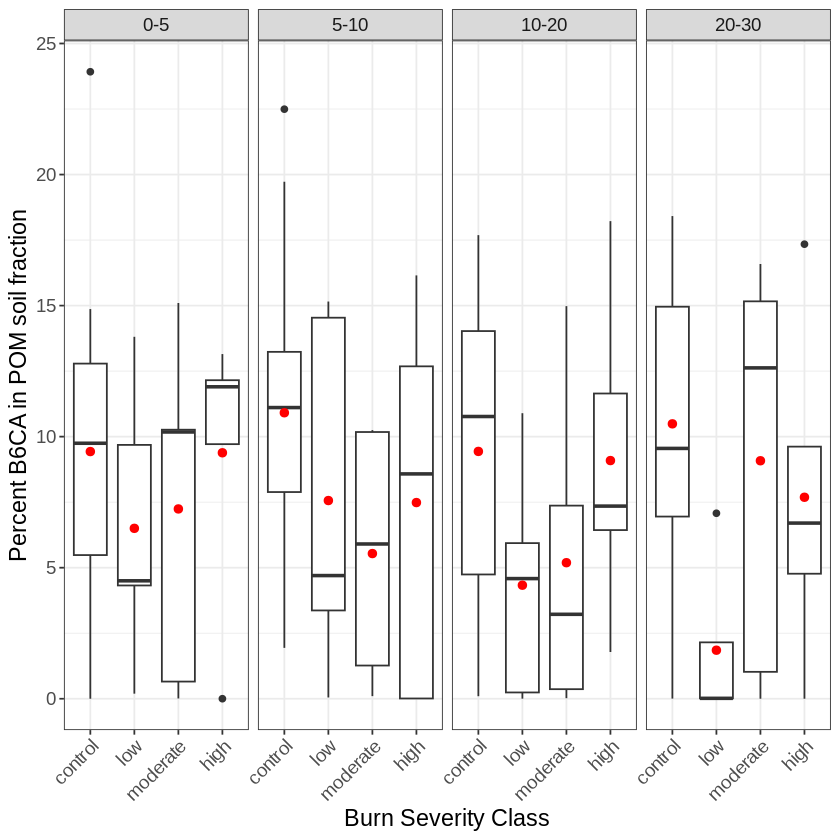

In [106]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(CONC_MEAN = mean(CONC_MEAN, na.rm = TRUE)*100),
                          by = .(BURN_SEVERITY, DEPTH)]

analysis_full_bpca_exp_dt %>%
ggplot(  aes(x = BURN_SEVERITY, y = CONC_MEAN*100)) +
  geom_boxplot() +
  geom_point(data = means_data, aes(y = CONC_MEAN), color = "red", size = 2) +
  facet_grid(. ~ DEPTH) +
  ylab('Percent B6CA in POM soil fraction') +
  xlab('Burn Severity Class') +
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 14))


Warning message:
“Removed 323 rows containing non-finite values (`stat_boxplot()`).”


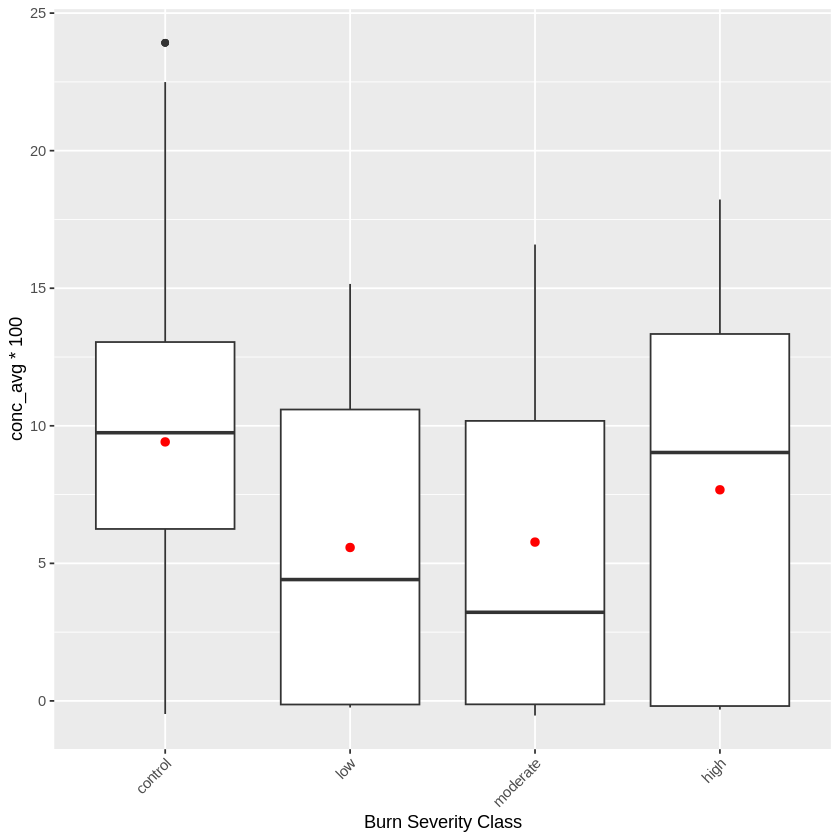

In [20]:
means_data <- LF_stoic_dt[!is.na(burn_severity) & burn_severity != 'blank' & Depth != '10-30 cm',
                          .(mean_conc = mean(conc_avg, na.rm = TRUE)*100),
                          by = .(burn_severity)]

ggplot(LF_stoic_dt, aes(x = burn_severity, y = conc_avg*100)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = mean_conc), color = "red", size = 2) +
    # facet_grid(.~.) +
    # ylim(0,1000000)+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

In [21]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = conc_mean)) +
    geom_boxplot( ) +
    geom_point()+
    # geom_smooth(method = 'lm')+
    # facet_grid(.~.) +
    #  ylim(0,10000000)+
#   geom_smooth(method = 'lm')+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

ERROR: Error in eval(expr, envir, enclos): object 'bpca_dt' not found


In [ ]:

LF_stoic_dt[,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))]
LF_stoic_dt[,conc_avg := mean(c(conc_216,conc_240),na.rm=T),by=1:nrow(LF_stoic_dt)]



LF_stoic_dt[!is.na(Depth)][,list(conc_avg = mean(conc_avg,na.rm=T)),by=.(site,burn_severity)] %>%
ggplot(aes(y=conc_avg,x=burn_severity))+
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
    geom_boxplot(aes(group=burn_severity))
    # facet_wrap(.~.)

In [ ]:
LF_stoic_dt %>% names

In [ ]:
# LF_stoic_dt <- fread
LF_stoic_dt[,Depth := paste0(depth_upper_cm %>% as.numeric,'-',depth_lower_cm %>% as.numeric) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

In [ ]:
LF_stoic_dt %>% names

In [77]:
# (conc_240/bpca_starting_mass_mg)*(fractionation_mass_recovered_g/starting_fract_mass_soil_g)*(C/100)
LF_stoic_dt[,g_kg := (conc_avg/bpca_starting_mass_mg) ]
LF_stoic_dt[,g_kg := mass_proportion_recovered/conc_avg,by=1:nrow(LF_stoic_dt)]
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site)] %>%
ggplot(aes(x = burn_severity, y = g_kg)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  # facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

ERROR: Error in eval(expr, envir, enclos): object 'LF_stoic_dt' not found


In [ ]:

LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site,Depth)] %>%
aov(g_kg ~ burn_severity, data = .) %>%
summary()

In [ ]:

LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),] %>%
ggplot(aes(x = burn_severity, y = g_kg)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

In [ ]:
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity)&fraction!='BULK',] %>%
ggplot(aes(x = burn_severity, y = C_perc)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales='free') +
  coord_cartesian(expand=TRUE)

In [ ]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =C_N)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)

In [ ]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =C_N,group=burn_severity)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  #ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  ylab('') +
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)